In [43]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [44]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [45]:
# fill all missing values of age with mean value of age
column_means_train = train_data.mean()
train_data = train_data.fillna(column_means_train)

column_means_test = test_data.mean()
test_data = test_data.fillna(column_means_test)

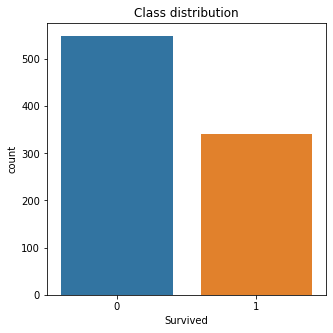

In [46]:
plt.subplots(figsize= (5,5))
sns.countplot(x='Survived',data = train_data)
plt.title('Class distribution')
plt.show()

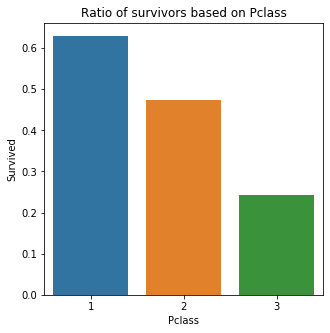

In [47]:
# find unique categories in a variable( here Pclass)
plt.subplots(figsize= (5,5))
sns.barplot(x='Pclass', y = 'Survived',data = train_data, ci = None)
plt.title('Ratio of survivors based on Pclass')
plt.show()

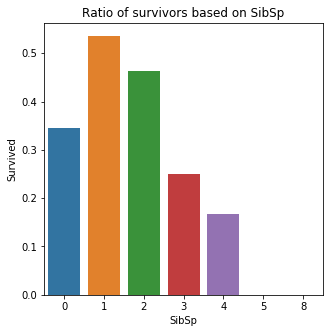

In [48]:
plt.subplots(figsize= (5,5))
sns.barplot(x='SibSp', y = 'Survived',data = train_data, ci = None)
plt.title('Ratio of survivors based on SibSp')
plt.show()

In [49]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
train_data.drop(columns=['Name', 'Pclass', 'SibSp', 'Parch','Ticket', 'Fare','Cabin','Embarked'], inplace=True)
test_data.drop(columns=['Name', 'Pclass', 'SibSp', 'Parch','Ticket', 'Fare','Cabin','Embarked'], inplace=True)
train_data.isnull().sum()


PassengerId    0
Survived       0
Sex            0
Age            0
dtype: int64

In [51]:
# To convert 'Sex' variable into numeric format, we will simply encode male with 1 and female with 0.

le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.fit_transform(test_data['Sex'])

In [52]:
train_data.head()

,PassengerId,Survived,Sex,Age
0,1,0,1,22.0
1,2,1,0,38.0
2,3,1,0,26.0
3,4,1,0,35.0
4,5,0,1,35.0


In [53]:
test_data.head()

,PassengerId,Sex,Age
0,892,1,34.5
1,893,0,47.0
2,894,1,62.0
3,895,1,27.0
4,896,0,22.0


In [54]:
# fit data to logistic model
from sklearn.model_selection import train_test_split

X=train_data.iloc[:,2:]
y=train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Predict accuracy using test data

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [56]:
# Function to generate submission file to get test score
def submission(preds):
    test_data['Survived'] = preds
    predictions = test_data[['PassengerId', 'Survived']]
    predictions.to_csv('Results.csv', index=False)

In [58]:
# predict for given data- test data
X_test_data= test_data.iloc[:,1:]
ypreds=logreg.predict(X_test_data)
submission(ypreds)
